<a href="https://colab.research.google.com/github/neha-duggirala/Poetry-Generation/blob/master/Generating_Poetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing all the required packages**

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
import numpy as np 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
"Done Importing! Ready to go..!!!"

'Done Importing! Ready to go..!!!'

# **Downloading the william shakespeare sonnets dataset**

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2020-06-13 09:53:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-06-13 09:53:07 (111 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
text_file_path = '/tmp/sonnets.txt'

## Reading the text data from the downloaded path

In [0]:
f= open(text_file_path)
contents =f.read()
print("There are",len(contents),"words")

There are 93578 words


In [0]:
corpus = contents.lower().split("\n")
print("The number of sentences in the corpus are",len(corpus))

In [0]:
corpus[:10]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,']

## Tokenization

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_words = len(tokenizer.word_index) + 1

In [0]:
corpus[0]

'from fairest creatures we desire increase,'

## Tokens to Sequences

In [0]:
sequences = tokenizer.texts_to_sequences(corpus)

In [0]:
sequences[0]

[34, 417, 877, 166, 213, 517]

## Creating N-grams for the poetry

In [0]:
input_sequence =[]
for sequence in sequences:
 for itr in range(1,len(sequence)):
   n_gram = sequence[:itr+1]
   input_sequence.append(n_gram)

In [0]:
len(input_sequence)

15462

In [0]:
input_sequence[:20]

[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517],
 [8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635]]

## Padding the sequences

In [0]:
pad_seq = pad_sequences(input_sequence)

In [0]:
pad_seq[:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  34, 417],
       [  0,   0,   0,   0,   0,   0,   0,   0,  34, 417, 877],
       [  0,   0,   0,   0,   0,   0,   0,  34, 417, 877, 166],
       [  0,   0,   0,   0,   0,   0,  34, 417, 877, 166, 213],
       [  0,   0,   0,   0,   0,  34, 417, 877, 166, 213, 517],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 878],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8, 878, 134],
       [  0,   0,   0,   0,   0,   0,   0,   8, 878, 134, 351],
       [  0,   0,   0,   0,   0,   0,   8, 878, 134, 351, 102],
       [  0,   0,   0,   0,   0,   8, 878, 134, 351, 102, 156],
       [  0,   0,   0,   0,   8, 878, 134, 351, 102, 156, 199],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  22],
       [  0,   0,   0,   0,   0,   0,   0,   0,  16,  22,   2],
       [  0,   0,   0,   0,   0,   0,   0,  16,  22,   2, 879],
       [  0,   0,   0,   0,   0,   0,  16,  22,   2, 879,  61],
       [  0,   0,   0,   0,   0,  16,  2

In [0]:
X=pad_seq[:,:-1]
y = pad_seq[:,-1]

In [0]:
X[0],y[0]

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34], dtype=int32), 417)

## Categorical labeling 

In [0]:
import keras
labels = keras.utils.to_categorical(y)

Using TensorFlow backend.


## **Model Architecture**

In [0]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [0]:
history = model.fit(X, labels, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 50s 103ms/step - loss: 6.9162 - accuracy: 0.0218
Epoch 2/100
484/484 [==============================] - 50s 104ms/step - loss: 6.4989 - accuracy: 0.0226
Epoch 3/100
484/484 [==============================] - 50s 104ms/step - loss: 6.4082 - accuracy: 0.0240
Epoch 4/100
484/484 [==============================] - 50s 103ms/step - loss: 6.2938 - accuracy: 0.0289
Epoch 5/100
484/484 [==============================] - 50s 104ms/step - loss: 6.1854 - accuracy: 0.0364
Epoch 6/100
484/484 [==============================] - 50s 104ms/step - loss: 6.0940 - accuracy: 0.0408
Epoch 7/100
484/484 [==============================] - 50s 104ms/step - loss: 6.0157 - accuracy: 0.0422
Epoch 8/100
484/484 [==============================] - 50s 103ms/step - loss: 5.9401 - accuracy: 0.0475
Epoch 9/100
484/484 [==============================] - 50s 104ms/step - loss: 5.8458 - accuracy: 0.0496
Epoch 10/100
484/484 [==============================] - 50s 104m

## **Accuracy Vs Epochs** 

In [0]:
model.save("/content/model.h5")

In [0]:
!ls /content/

sample_data  shakespeare.txt


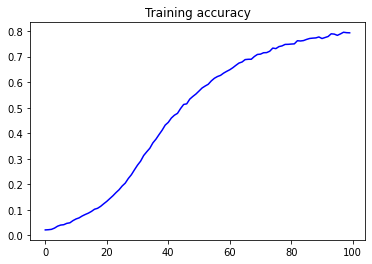

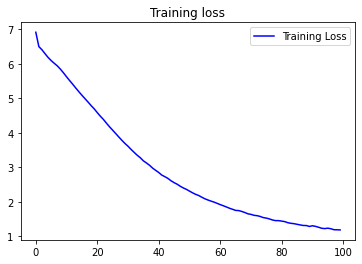

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

# *Tada..! Ready to generate some poetry*

In [0]:
seed_text = "you're my only love"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
you're my only as my slight part and ever another end chary near date days seen gone find be days exceeds say me new change thee true my rhyme ' alone to give forth men twain cross reap nearly deem'd nearly nearly days seen bring up hate new twain twain do do say men bright best bright ' live deem'd deem'd seen more rage than night away new days suppress'd convert hence made new true eyes new old eyes heir rare worth in thee new me not so new ' contains live seen change eye to so more rare 'will ' alone alone
